Nama : Florian Natanael Manafe

NIM : 202201001

Prodi ": Sistem Informasi (A)

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [6]:
dataset = pd.read_csv('/content/Salary_Data2.csv')

In [30]:
x = dataset.iloc[:, [0, 5]].values
y = dataset.iloc[:, -1].values

In [32]:
# Convert NumPy arrays back to pandas DataFrame and Series
x_df = pd.DataFrame(x)
y_series = pd.Series(y)

# Concatenate the pandas objects
combined_data = pd.concat([x_df, y_series], axis=1)

# Continue with the rest of the code
rows_with_nan_in_y = combined_data.iloc[:, -1].isna()
combined_data_cleaned = combined_data.drop(index=combined_data[rows_with_nan_in_y].index)

# Convert back to NumPy arrays if needed for subsequent steps
x = combined_data_cleaned.iloc[:, :-1].values
y = combined_data_cleaned.iloc[:, -1].values

In [33]:
from sklearn.model_selection import train_test_split
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size=0.25, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler ()
x_latih = std.fit_transform(x_latih)
x_tes = std.transform(x_tes)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [36]:
y_prediksi = classifier.predict(x_tes)

In [37]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_tes, y_prediksi)
print (hasil_cm)

[[ 0  1  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  1  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]]


In [38]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_tes, y_prediksi)
print (akurasi)

0.8567164179104477


<ipython-input-39-37fc193c5923>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (x_data [y_data == h, 0], x_data[y_data == h, 1],


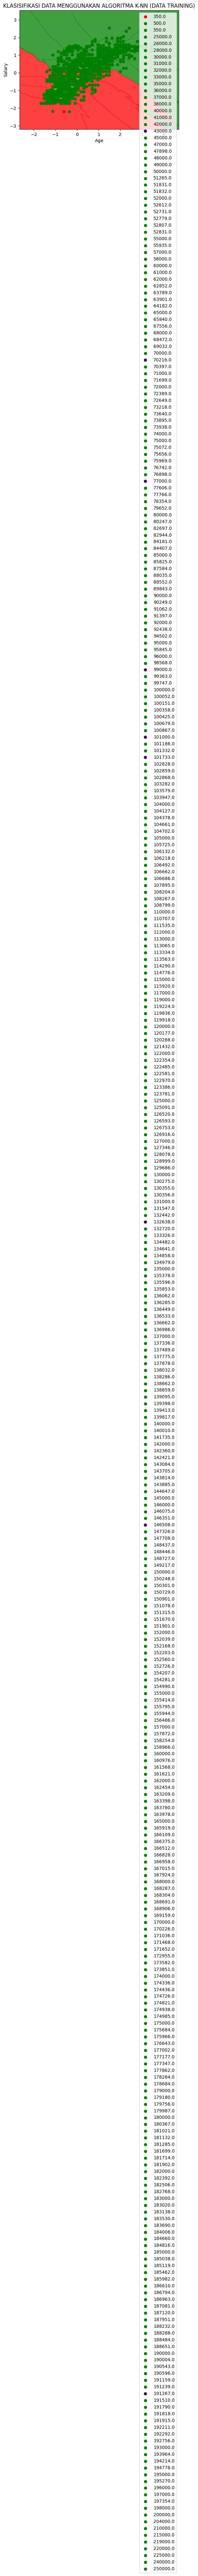

In [39]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min()-1, stop=x_data[:, 0]. max()+1, step=0.01),
                           np.arange(start=x_data[:, 1].min()-1, stop=x_data[:, 1]. max()+1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate (np.unique(y_data)):
    plt.scatter (x_data [y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap (('red', 'green'))(g), label = h)
plt.title('KLASISIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TRAINING)')
plt.xlabel('Age')
plt.ylabel ('Salary')
plt.legend()
plt.show()

<ipython-input-40-1c4b755ef468>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (x_data [y_data == h, 0], x_data[y_data == h, 1],


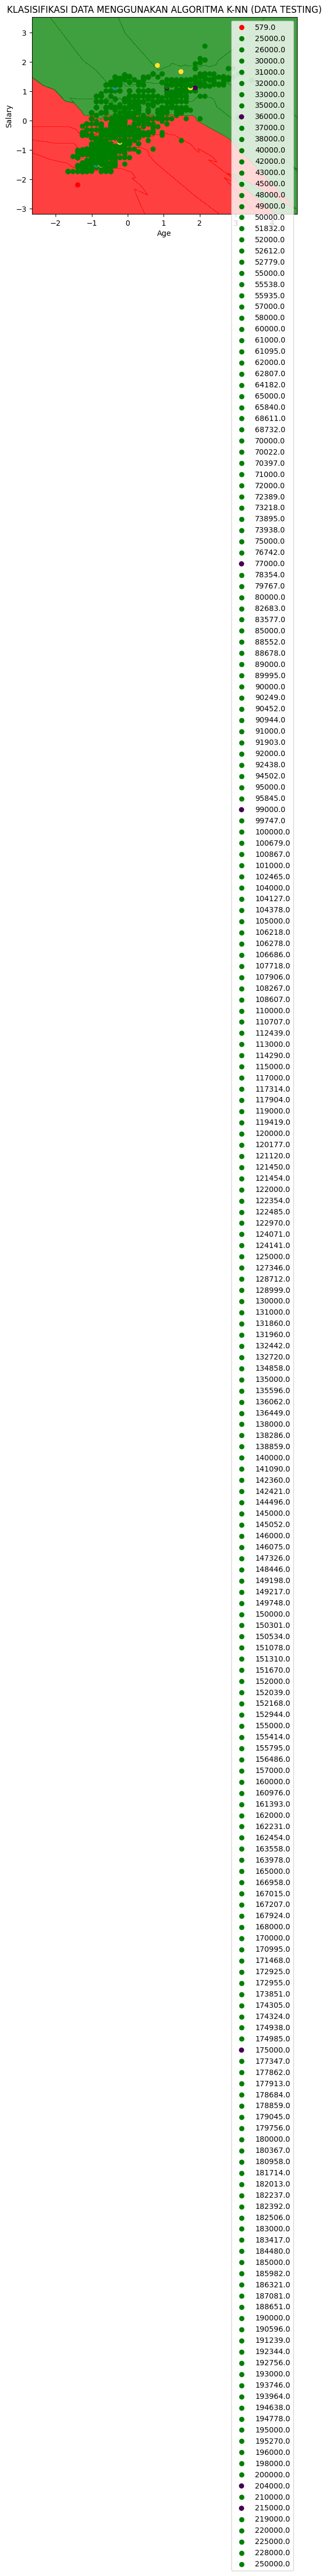

In [40]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_tes, y_tes
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min()-1, stop=x_data[:, 0]. max()+1, step=0.01),
                           np.arange(start=x_data[:, 1].min()-1, stop=x_data[:, 1]. max()+1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate (np.unique(y_data)):
    plt.scatter (x_data [y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap (('red', 'green'))(g), label = h)
plt.title('KLASISIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TESTING)')
plt.xlabel('Age')
plt.ylabel ('Salary')
plt.legend()
plt.show()